In [9]:
from sklearn.datasets import fetch_openml

In [11]:
mnist = fetch_openml?

In [14]:
mnist = fetch_openml(name = 'mnist_784', version = 1)

In [15]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [40]:
X, y = mnist['data'], mnist['target']

In [41]:
X.shape

(70000, 784)

In [42]:
y.shape

(70000,)

In [31]:
import matplotlib as mlt
from matplotlib import pyplot as plt
import numpy as np

In [25]:
some_digit = X[0]
some_digit

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [26]:
some_digit_image = some_digit.reshape(28, 28)
some_digit_image

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

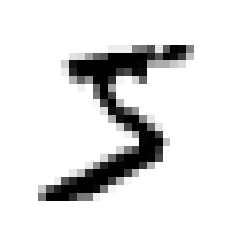

In [23]:
plt.imshow(some_digit_image, cmap = 'binary')
plt.axis('off')
plt.show()

In [44]:
y = y.astype(np.uint8)
y
y.shape

(70000,)

In [35]:
X_train, X_test = X[:60000], X[60000:]

In [49]:
y_train, y_test = y[:60000], y[60000:]

In [50]:
y_train_5 = (y_train == 5)

In [51]:
y_test_5 = (y_test == 5)

In [78]:
from sklearn.linear_model import SGDClassifier

In [79]:
sgd_clf = SGDClassifier(random_state = 42)

In [80]:
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [81]:
sgd_clf.predict([some_digit])

array([ True])

In [82]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

In [83]:
skfold = StratifiedKFold(n_splits = 3)

In [84]:
for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct/len(y_pred))

0.95035
0.96035
0.9604


In [85]:
from sklearn.model_selection import cross_val_score

In [86]:
cross_val_score(sgd_clf, X_train, y_train_5, cv = 3, scoring = 'accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [87]:
from sklearn.base import BaseEstimator

In [88]:
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype = bool)

In [89]:
never_5_clf = Never5Classifier()

In [90]:
cross_val_score(never_5_clf, X_train, y_train_5, cv = 3, scoring = 'accuracy')

array([0.91125, 0.90855, 0.90915])

In [91]:
from sklearn.model_selection import cross_val_predict

In [93]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 5)

In [94]:
from sklearn.metrics import confusion_matrix

In [96]:
confusion_matrix(y_train_5, y_train_pred)

array([[53115,  1464],
       [  916,  4505]])

In [97]:
from sklearn.metrics import precision_score, recall_score

In [98]:
precision_score(y_train_5, y_train_pred)

0.7547327860613168

In [99]:
recall_score(y_train_5, y_train_pred)

0.8310274857037447

In [100]:
from sklearn.metrics import f1_score

In [101]:
f1_score(y_train_5, y_train_pred)

0.791044776119403

In [102]:
y_scores = sgd_clf.decision_function([some_digit])

In [103]:
y_scores

array([2164.22030239])

In [104]:
threshold = 0

In [105]:
y_some_digit_pred = (y_scores > threshold)

In [107]:
y_some_digit_pred

array([ True])

In [108]:
threshold = 8000

In [109]:
y_some_digit_pred = (y_scores > threshold)

In [110]:
y_some_digit_pred

array([False])

In [112]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3, method = 'decision_function')

In [113]:
from sklearn.metrics import precision_recall_curve

In [114]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [121]:
def plot_precision_recall_vs_threshold(precisions, recalls, threshold):
    plt.plot(threshold, precisions[:-1], 'b--', label = 'Precision')
    plt.plot(threshold, recalls[:-1], 'g--', label = 'recall')

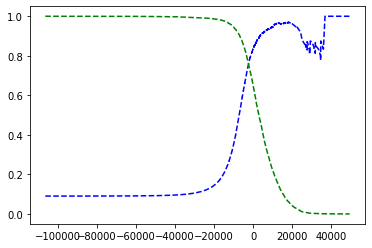

In [123]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

In [125]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

In [126]:
threshold_90_precision

3370.0194991439557

In [127]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [128]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [129]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

In [130]:
from sklearn.metrics import roc_curve

In [131]:
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [143]:
def plot_roc_curve(fpr, tpr, label = None):
    plt.plot(fpr, tpr, linewidth = 2, label = label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel = 'False Positive Rate'
    plt.ylabel = 'True Positive Rate'

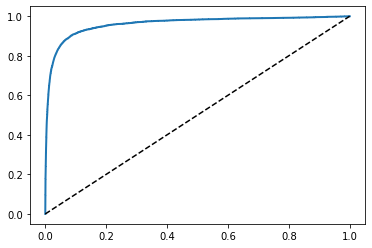

In [145]:
plot_roc_curve(fpr, tpr)
plt.show()

In [147]:
from sklearn.metrics import roc_auc_score

In [149]:
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [150]:
from sklearn.ensemble import RandomForestClassifier

In [151]:
forest_clf = RandomForestClassifier(random_state = 42)

In [152]:
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method = 'predict_proba')

In [153]:
y_scores_forest = y_probas_forest[:, 1]

In [154]:
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

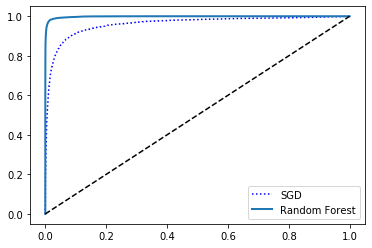

In [157]:
plt.plot(fpr, tpr, 'b:', label = 'SGD')
plot_roc_curve(fpr_forest, tpr_forest, 'Random Forest')
plt.legend(loc = 'lower right')

In [158]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

In [159]:
from sklearn.svm import SVC

In [160]:
svm_clf = SVC()

In [161]:
svm_clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [162]:
svm_clf.predict([some_digit])

array([5], dtype=uint8)

In [163]:
some_digit_scores = svm_clf.decision_function([some_digit])

In [164]:
some_digit_scores

array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [165]:
np.argmax(some_digit_scores)

5

In [166]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [167]:
from sklearn.multiclass import OneVsRestClassifier

In [168]:
ovr_clf = OneVsRestClassifier(SVC())

In [169]:
ovr_clf.fit(X_train, y_train)

OneVsRestClassifier(estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                  class_weight=None, coef0=0.0,
                                  decision_function_shape='ovr', degree=3,
                                  gamma='scale', kernel='rbf', max_iter=-1,
                                  probability=False, random_state=None,
                                  shrinking=True, tol=0.001, verbose=False),
                    n_jobs=None)

In [171]:
ovr_clf.predict([some_digit])

array([5], dtype=uint8)

In [172]:
len(ovr_clf.estimators_)

10